In [1]:
from examples.tvb_nest.notebooks.cerebellum.scripts.scripts import *

# Get configuration
config, plotter = configure()
config.SIMULATION_LENGTH = 2000.0
plotter = None
# Load connectome and other structural files
connectome, major_structs_labels, voxel_count, inds = load_connectome(config, plotter=plotter)
# Construct some more indices and maps
inds, maps = construct_extra_inds_and_maps(connectome, inds)
# Logprocess connectome
connectome = logprocess_weights(connectome, inds, print_flag=True, plotter=plotter)
# Prepare connectivity with all possible normalizations
connectivity = build_connectivity(connectome, inds, config, print_flag=True, plotter=plotter)
# Prepare model
model = build_model(connectivity.number_of_regions, inds, maps, config)
# Prepare simulator
simulator = build_simulator(connectivity, model, inds, maps, config, print_flag=True, plotter=plotter)

2022-07-01 10:06:24,797 - INFO - tvb_multiscale.tvb_nest.config - Loading a NEST instance...
2022-07-01 10:06:24,797 - INFO - tvb_multiscale.tvb_nest.config - Loading a NEST instance...
2022-07-01 10:06:24,799 - INFO - tvb_multiscale.tvb_nest.config - NEST_INSTALL_DIR: /home/docker/env/neurosci/nest_build
2022-07-01 10:06:24,799 - INFO - tvb_multiscale.tvb_nest.config - NEST_INSTALL_DIR: /home/docker/env/neurosci/nest_build
2022-07-01 10:06:24,802 - INFO - tvb_multiscale.tvb_nest.config - NEST_DATA_DIR: /home/docker/env/neurosci/nest_build/share/nest
2022-07-01 10:06:24,802 - INFO - tvb_multiscale.tvb_nest.config - NEST_DATA_DIR: /home/docker/env/neurosci/nest_build/share/nest
2022-07-01 10:06:24,804 - INFO - tvb_multiscale.tvb_nest.config - NEST_DOC_DIR: /home/docker/env/neurosci/nest_build/share/doc/nest
2022-07-01 10:06:24,804 - INFO - tvb_multiscale.tvb_nest.config - NEST_DOC_DIR: /home/docker/env/neurosci/nest_build/share/doc/nest
2022-07-01 10:06:24,806 - INFO - tvb_multiscale.tv

Outputs' path: /home/docker/packages/tvb-multiscale/examples/tvb_nest/notebooks/cerebellum/outputs/cwc

normalized weights [min, max] = 
 [1.0, 27.639354909547873]
2022-07-01 10:06:25,652 - WARNING - tvb_multiscale.core.tvb.cosimulator.cosimulator_serial - Current step is not 0 upon configuration!
Setting it to 0. Initial condition might be affected!


/home/docker/packages/tvb-multiscale/tvb_multiscale/core/spiking_models/node_set.py:34: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def __init__(self, nodes=pd.Series(), **kwargs):
/home/docker/packages/tvb-multiscale/tvb_multiscale/core/spiking_models/devices.py:953: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def __init__(self, device_set=pd.Series(), **kwargs):


Current step is not 0 upon configuration!
Setting it to 0. Initial condition might be affected!
CoSimulatorSerial (
  title .................... 'CoSimulatorSerial gid: 1e0ee772-f5cf-4a40-afc6-178d1248879a'
  Type ..................... 'CoSimulatorSerial'
  model .................... WilsonCowanThalamoCortical gid: bd882768-737b-43e7-96f4-f33bb7074b83
  output_interfaces ........ None
  input_interfaces ......... None
  out_proxy_inds ........... --------------------
  shape .................... (0,)
  dtype .................... int64
  is empty ................. True
  exclusive ................ False
  voi ...................... --------------------
  proxy_inds ............... --------------------
  synchronization_time ..... 0.0
  connectivity ............. Connectivity gid: d2d338d4-eb5c-4f2e-96ce-e9eea4a100bd
  conduction_speed ......... 3.0
  coupling ................. SigmoidalPreThalamoCortical gid: 6233b094-1e95-4c4b-addc-f7f141e3e2eb
  surface .................. None
  stimu

<Figure size 432x288 with 0 Axes>

In [2]:
# let us run the mean field simulation
#simulate(simulator, config)
results, transient = simulate(simulator, config, print_flag=True)


Simulated in 105.294438 secs!


# Plot results and write them to HDF5 files

In [3]:
from scipy.io import savemat
# set to False for faster plotting of only mean field variables and dates, apart from spikes" rasters:
plot_per_neuron = False  
MAX_VARS_IN_COLS = 2
MAX_REGIONS_IN_ROWS = 10
MIN_REGIONS_FOR_RASTER_PLOT = 9
# from examples.plot_write_results import plot_write_results
# plot_write_results(results, simulator, populations=populations, 
#                    transient=transient, tvb_state_variable_type_label="State Variables", 
#                    tvb_state_variables_labels=simulator.model.variables_of_interest, 
#                    plot_per_neuron=plot_per_neuron, plotter=plotter, config=config)
from tvb_multiscale.core.plot.plotter import Plotter
plotter = Plotter(config.figures)
# Load connectome and other structural files
connectome, major_structs_labels, voxel_count, inds = load_connectome(config, plotter=plotter)
# Construct some more indices and maps
inds, maps = construct_extra_inds_and_maps(connectome, inds)
# inds = config.inds
# maps = config.maps
# transient = config.transient + 0.5
transient += 0.5
simulation_length = simulator.simulation_length
FIGSIZE = config.figures.DEFAULT_SIZE


major_structs_labels:
 ['Left Cerebellar Cortex' 'Left Cerebellar Nuclei'
 'Left Cortical Subplate' 'Left Hippocampal Formation' 'Left Hypothalamus'
 'Left Isocortex' 'Left Medulla' 'Left Midbrain'
 'Left Nonspecific Thalamus' 'Left Olfactory Areas' 'Left Pallidum'
 'Left Pons Behavioral' 'Left Pons Motor' 'Left Pons Sensory'
 'Left Specific Thalamus' 'Left Spinal nucleus of the trigeminal'
 'Left Striatum' 'Right Cerebellar Cortex' 'Right Cerebellar Nuclei'
 'Right Cortical Subplate' 'Right Hippocampal Formation'
 'Right Hypothalamus' 'Right Isocortex' 'Right Medulla' 'Right Midbrain'
 'Right Nonspecific Thalamus' 'Right Olfactory Areas' 'Right Pallidum'
 'Right Pons Behavioral' 'Right Pons Motor' 'Right Pons Sensory'
 'Right Specific Thalamus' 'Right Spinal nucleus of the trigeminal'
 'Right Striatum']
ROI inds:
 {'crtx': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28

In [4]:
# If you want to see what the function above does, take the steps, one by one
try:
    # We need framework_tvb for writing and reading from HDF5 files
    from tvb_multiscale.core.tvb.io.h5_writer import H5Writer
    writer = H5Writer()
except:
    writer = False
    
from tvb.contrib.scripts.datatypes.time_series import TimeSeriesRegion
from tvb.contrib.scripts.datatypes.time_series_xarray import TimeSeriesRegion as TimeSeriesXarray

# Put the results in a Timeseries instance
from tvb.contrib.scripts.datatypes.time_series import TimeSeriesRegion

source_ts = None
bold_ts = None

if results is not None:
    source_ts = TimeSeriesXarray(  # substitute with TimeSeriesRegion fot TVB like functionality
            data=results[0][1], time=results[0][0],
            connectivity=simulator.connectivity,
            labels_ordering=["Time", "State Variable", "Region", "Neurons"],
            labels_dimensions={"State Variable": list(simulator.model.variables_of_interest),
                               "Region": simulator.connectivity.region_labels.tolist()},
            sample_period=simulator.integrator.dt)
    source_ts.configure()

    t = source_ts.time

    # Write to file
    if writer:
        writer.write_tvb_to_h5(TimeSeriesRegion().from_xarray_DataArray(source_ts._data,
                                                                        connectivity=source_ts.connectivity),
                               os.path.join(config.out.FOLDER_RES, source_ts.title)+".h5")
    print("Raw ts:\n%s" % str(source_ts))
    
    if len(results) > 1:
        bold_ts = TimeSeriesXarray(  # substitute with TimeSeriesRegion fot TVB like functionality
                data=results[1][1], time=results[1][0],
                connectivity=simulator.connectivity,
                labels_ordering=["Time", "State Variable", "Region", "Neurons"],
                labels_dimensions={"State Variable": ["BOLD"],
                                   "Region": simulator.connectivity.region_labels.tolist()})
        bold_ts.configure()

        bold_t = source_ts.time

        # Write to file
        if writer:
            writer.write_tvb_to_h5(TimeSeriesRegion().from_xarray_DataArray(bold_ts._data,
                                                                            connectivity=bold_ts.connectivity),
                                   os.path.join(config.out.FOLDER_RES, bold_ts.title)+".h5")
        print("BOLD ts:\n%s" % str(bold_ts))
    

2022-07-01 10:08:11,821 - INFO - tvb.storage.h5.encryption.data_encryption_handler - Cannot import syncrypto library.
Raw ts:
TimeSeriesRegion (
  Dimensions .......... ['Time', 'State Variable', 'Region', 'Neurons']
  Length .............. 2200
  Region Mapping ...... None
  Region Mapping Volume  None
  Sample period ....... 1.0
  Source Connectivity . Connectivity gid: d2d338d4-eb5c-4f2e-96ce-e9eea4a100bd
  Time units .......... ms
  Time-series name .... Region Time Series
  Time-series type .... TimeSeriesRegion
  [min, median, max] .. [-11.8144, -0.21018, 2.10326]
  dtype ............... float64
  shape ............... (2200, 3, 214, 1)
)


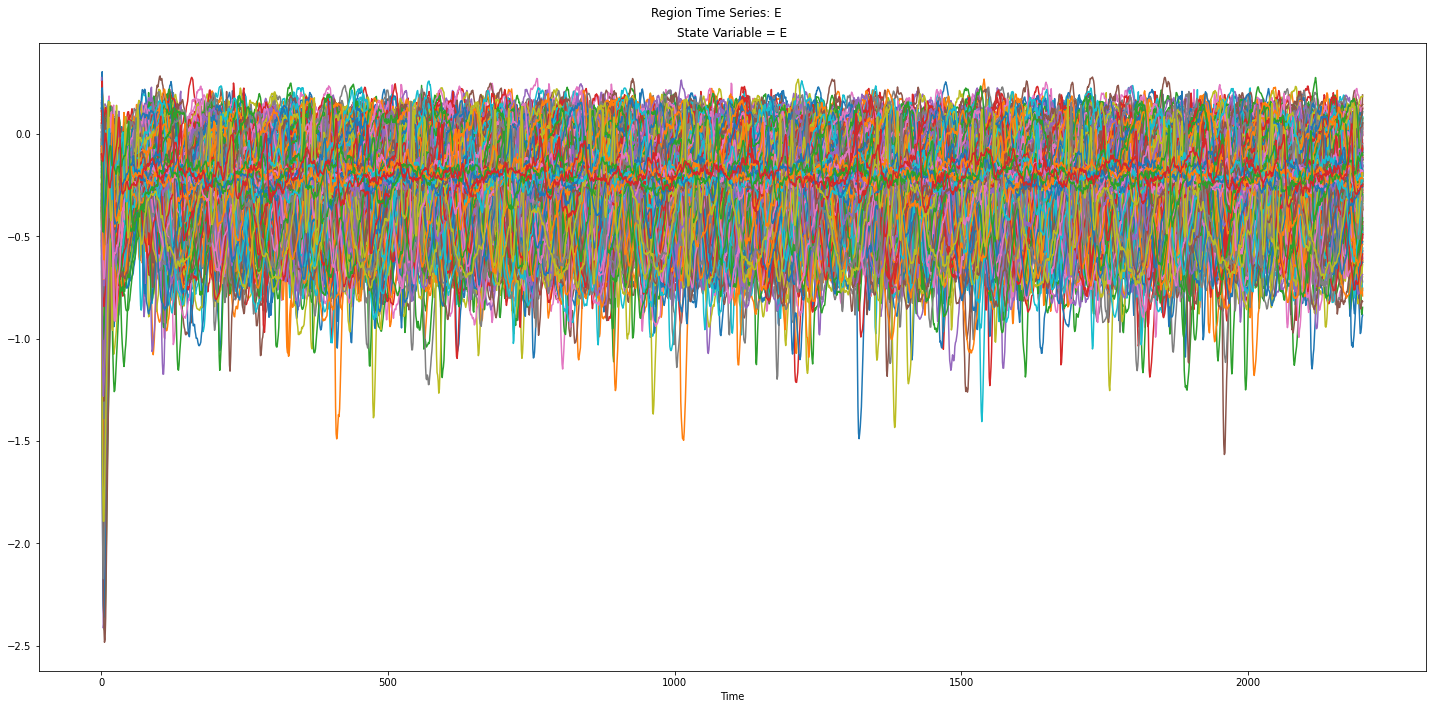

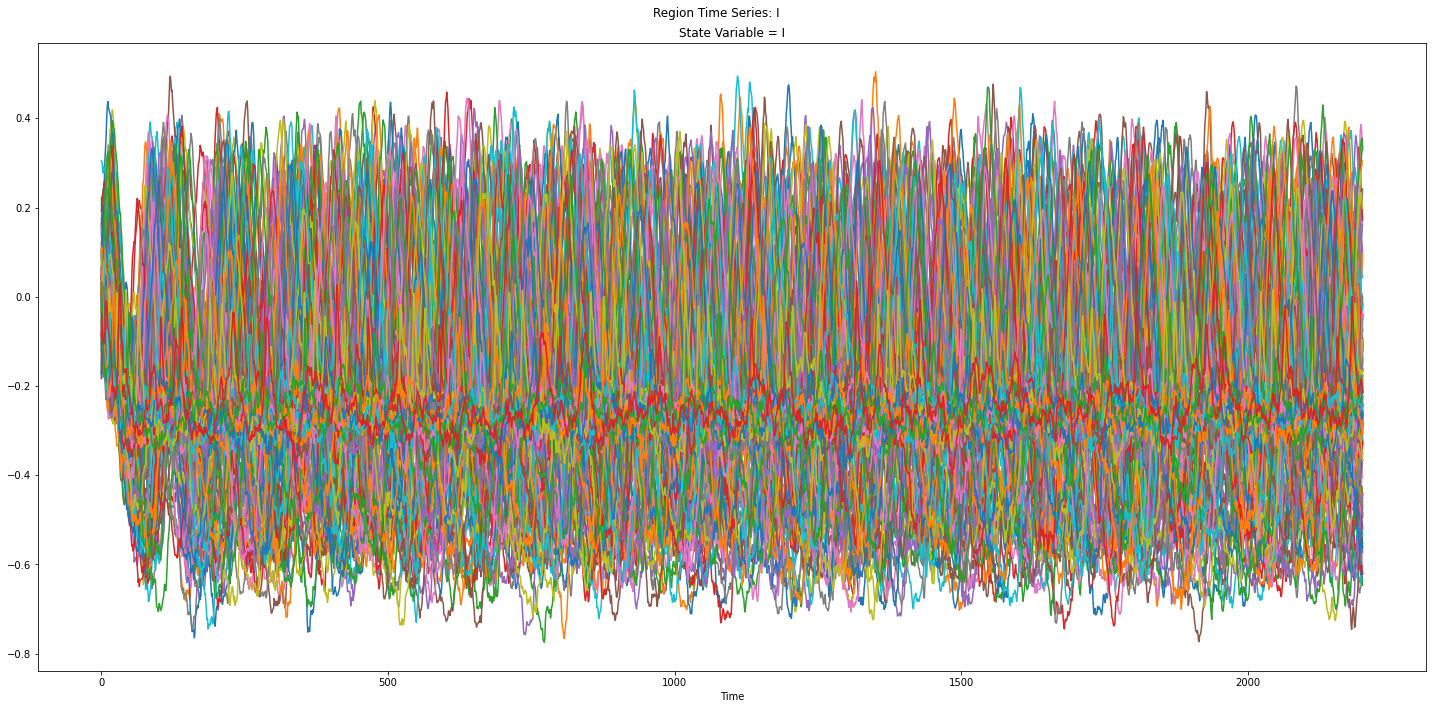

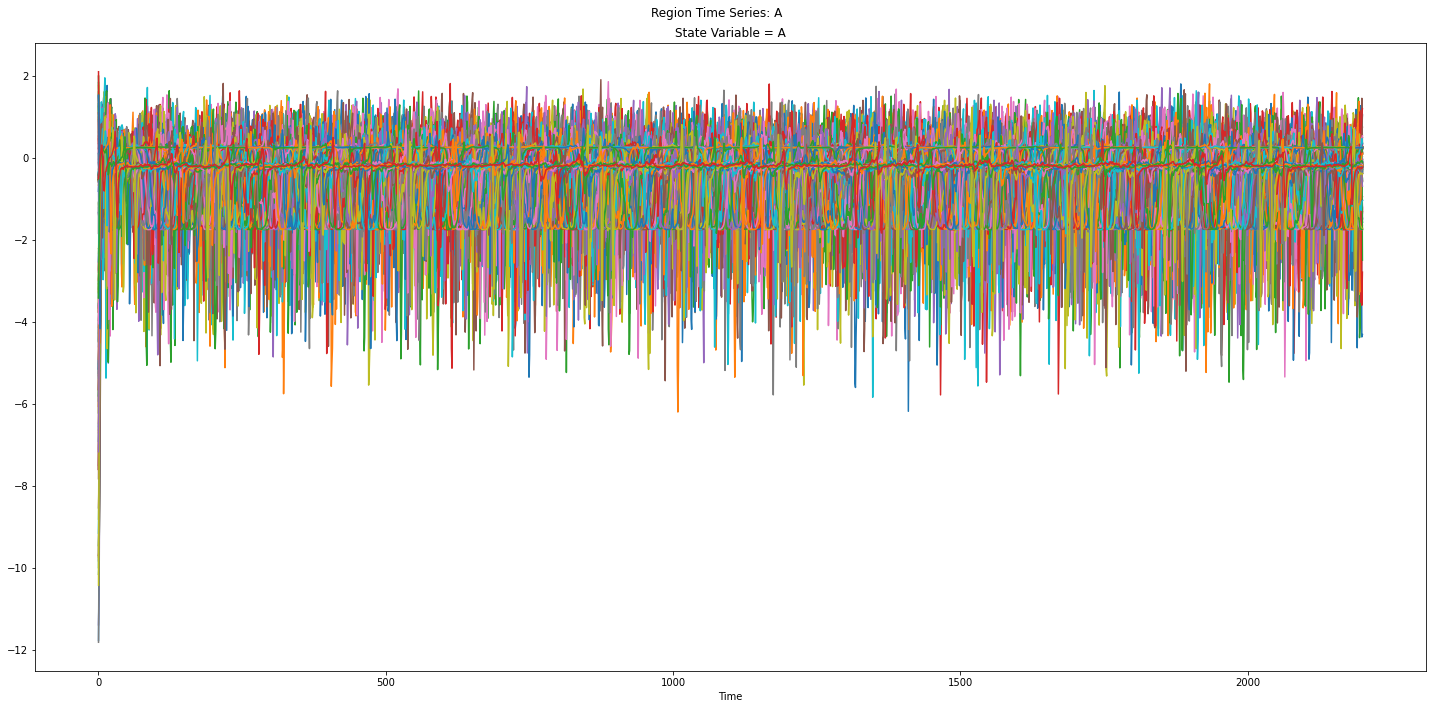

In [5]:
# Plot TVB time series
if source_ts is not None:
    source_ts[:, :, :, :].plot_timeseries(plotter_config=plotter.config, 
                          hue="Region" if source_ts.shape[2] > MAX_REGIONS_IN_ROWS else None, 
                          per_variable=source_ts.shape[1] > MAX_VARS_IN_COLS, 
                          figsize=FIGSIZE);

2022-07-01 10:08:19,567 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!
2022-07-01 10:08:19,574 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


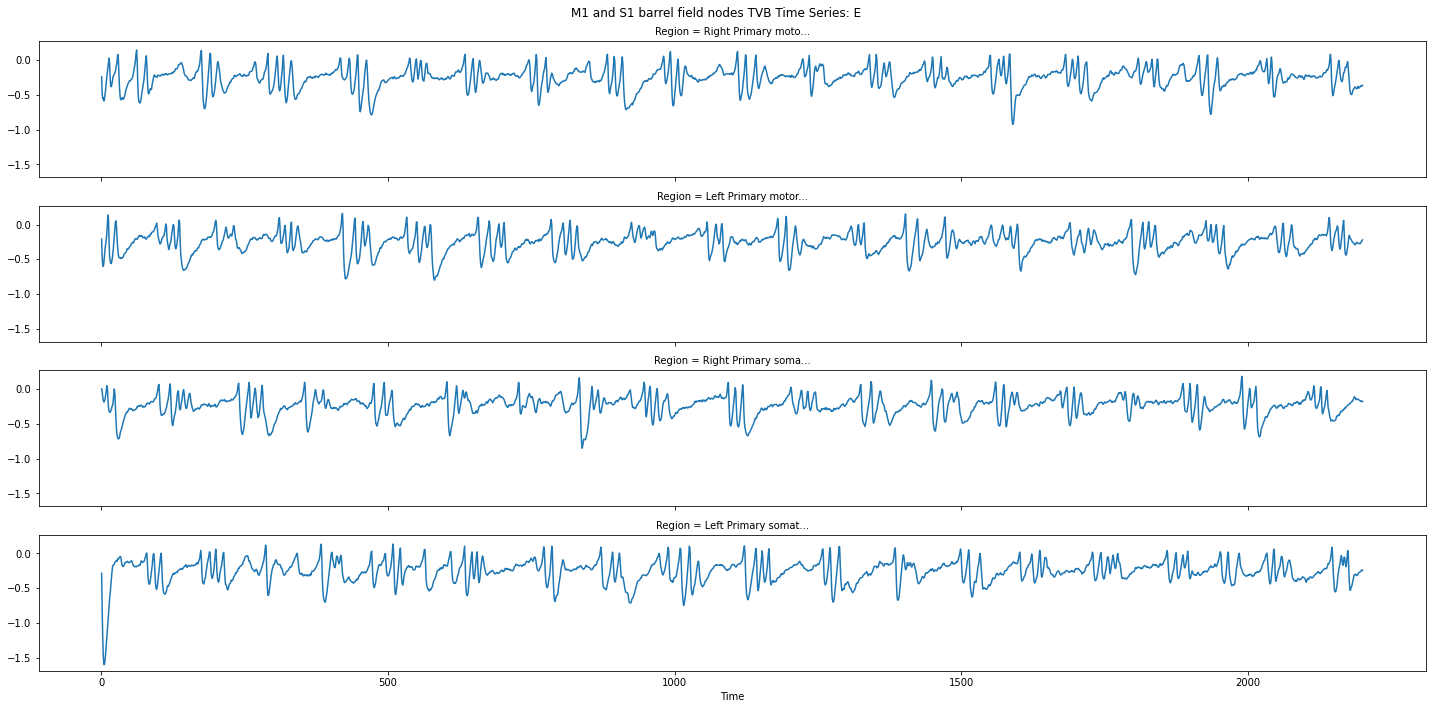

2022-07-01 10:08:20,198 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


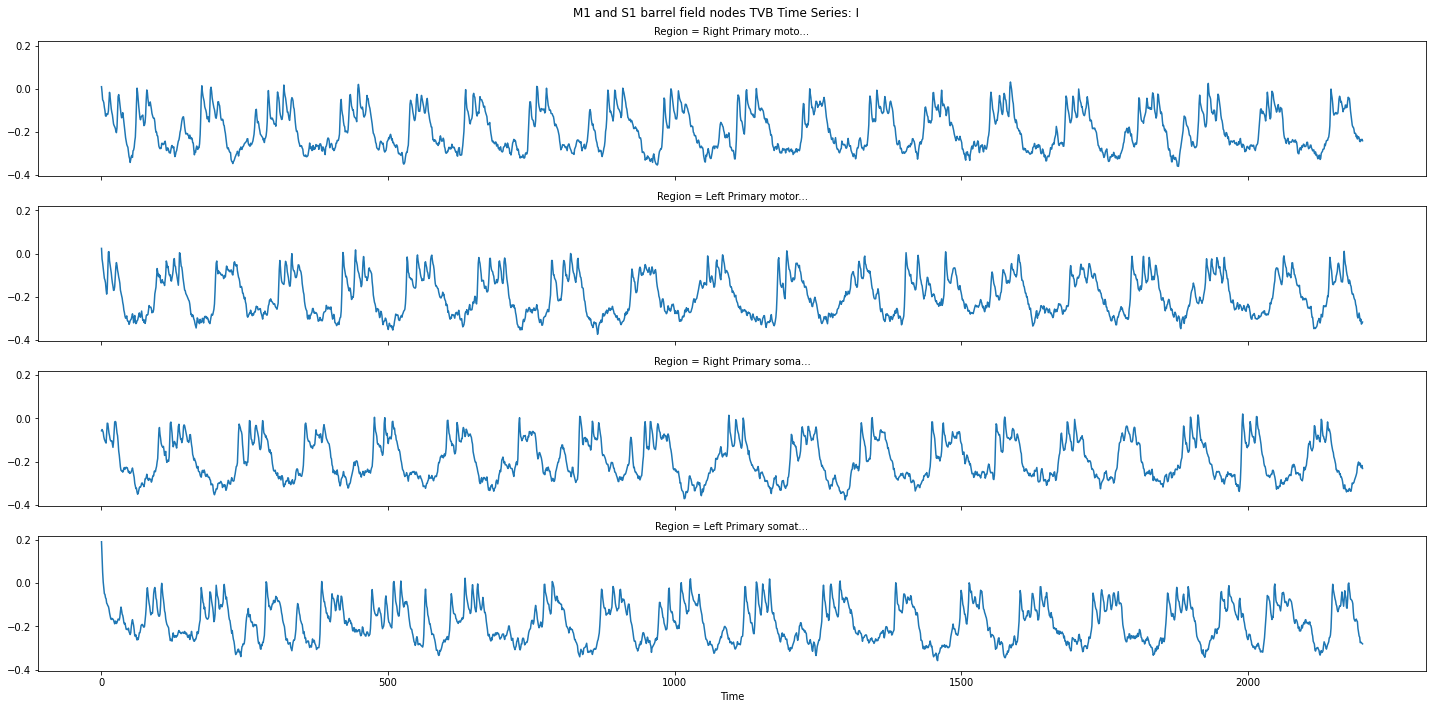

2022-07-01 10:08:20,939 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


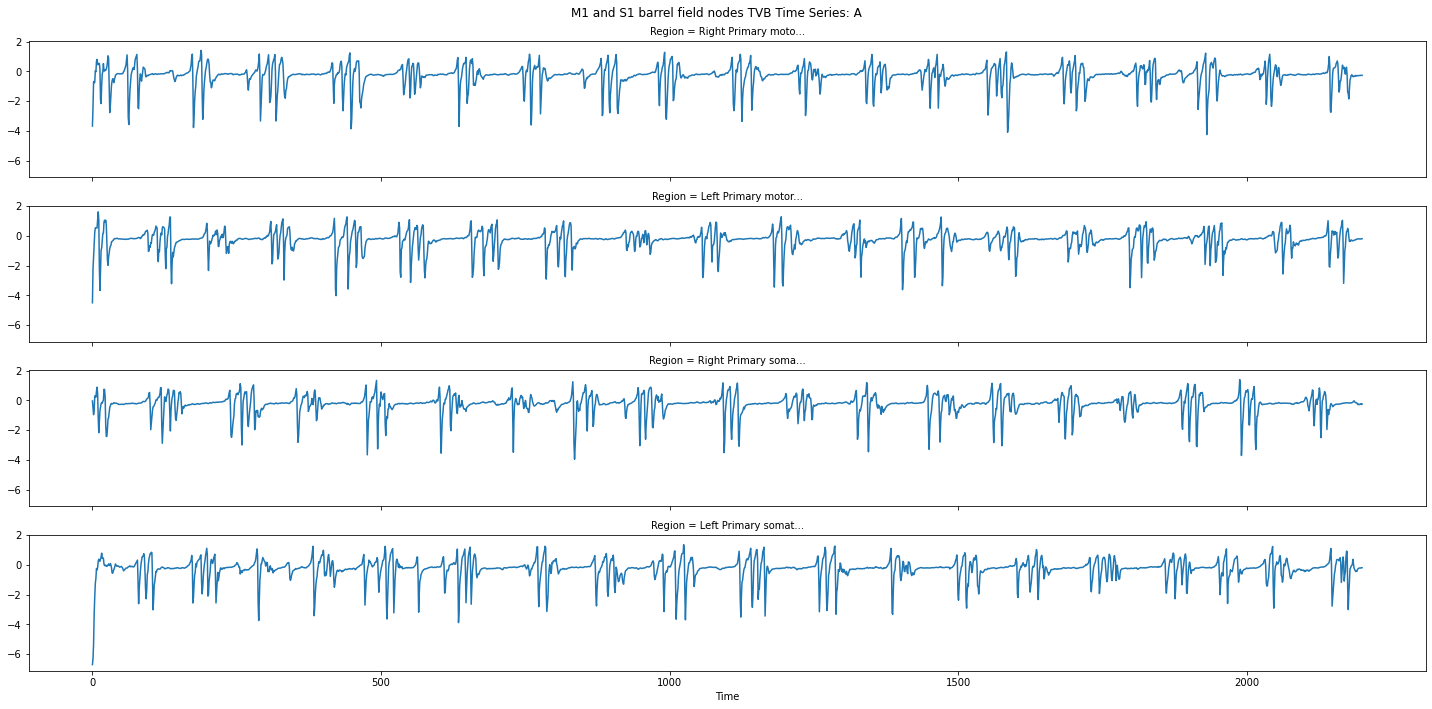

In [6]:
# Focus on the m1 and s1 barrel field nodes: 
if source_ts is not None:
    source_ts_m1s1brl = source_ts[-10000:, :, inds["m1s1brl"]]
    source_ts_m1s1brl.plot_timeseries(plotter_config=plotter.config, 
                                   hue="Region" if source_ts_m1s1brl.shape[2] > MAX_REGIONS_IN_ROWS else None, 
                                   per_variable=source_ts_m1s1brl.shape[1] > MAX_VARS_IN_COLS, 
                                   figsize=FIGSIZE, figname="M1 and S1 barrel field nodes TVB Time Series");

In [7]:
# Focus on the m1 and s1 barrel field nodes: raster plot
if source_ts is not None and source_ts_m1s1brl.number_of_labels > MIN_REGIONS_FOR_RASTER_PLOT:
    source_ts_m1s1brl.plot_raster(plotter_config=plotter.config, 
                                  per_variable=source_ts_m1s1brl.shape[1] > MAX_VARS_IN_COLS,
                                  figsize=FIGSIZE, figname="M1 and S1 barrel field nodes TVB Time Series Raster");

2022-07-01 10:08:21,576 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!
2022-07-01 10:08:21,582 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


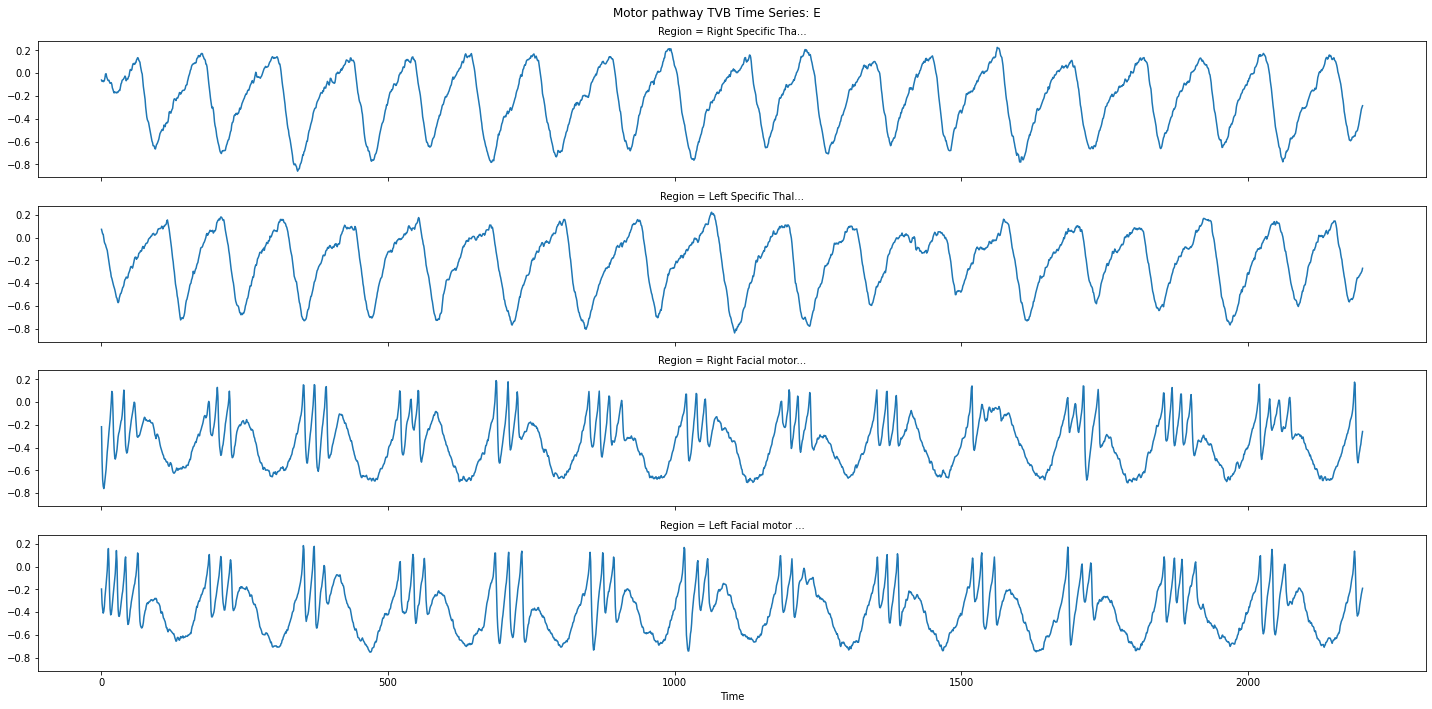

2022-07-01 10:08:22,242 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


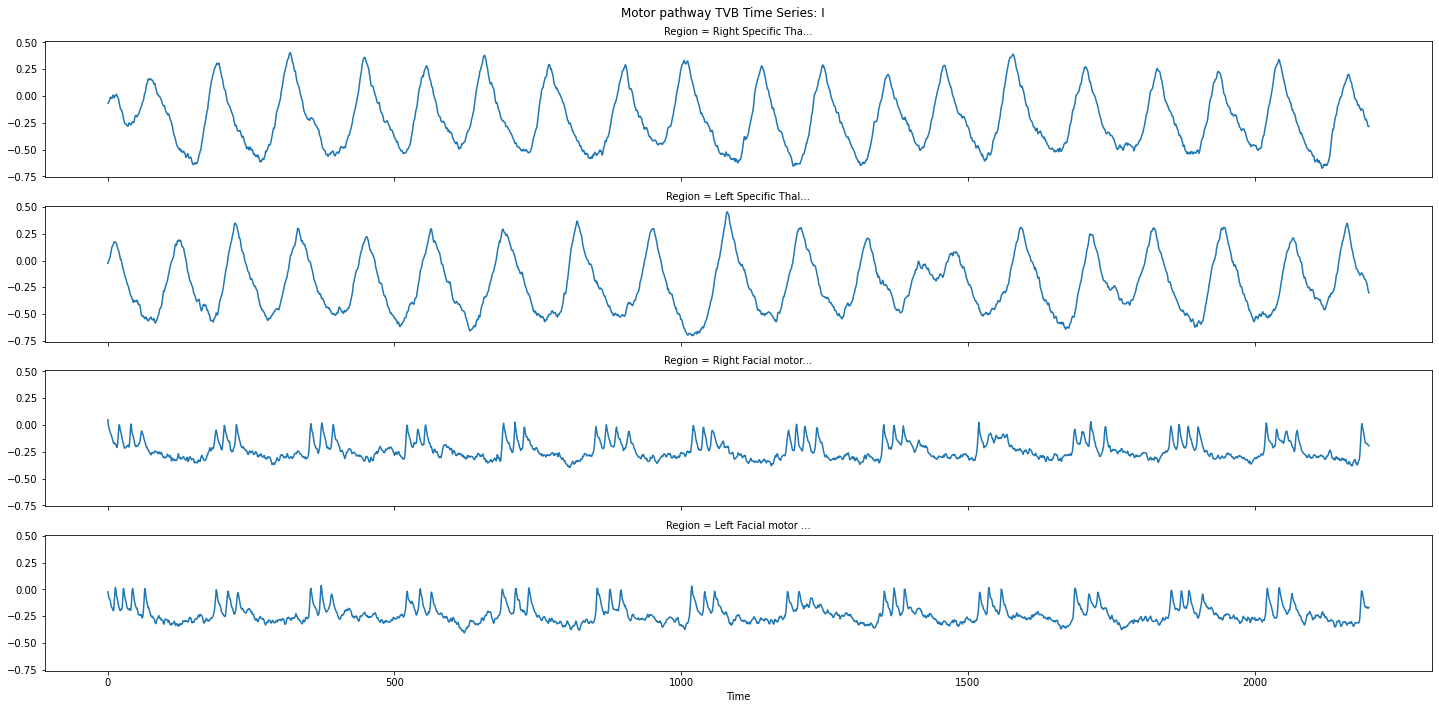

2022-07-01 10:08:22,864 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


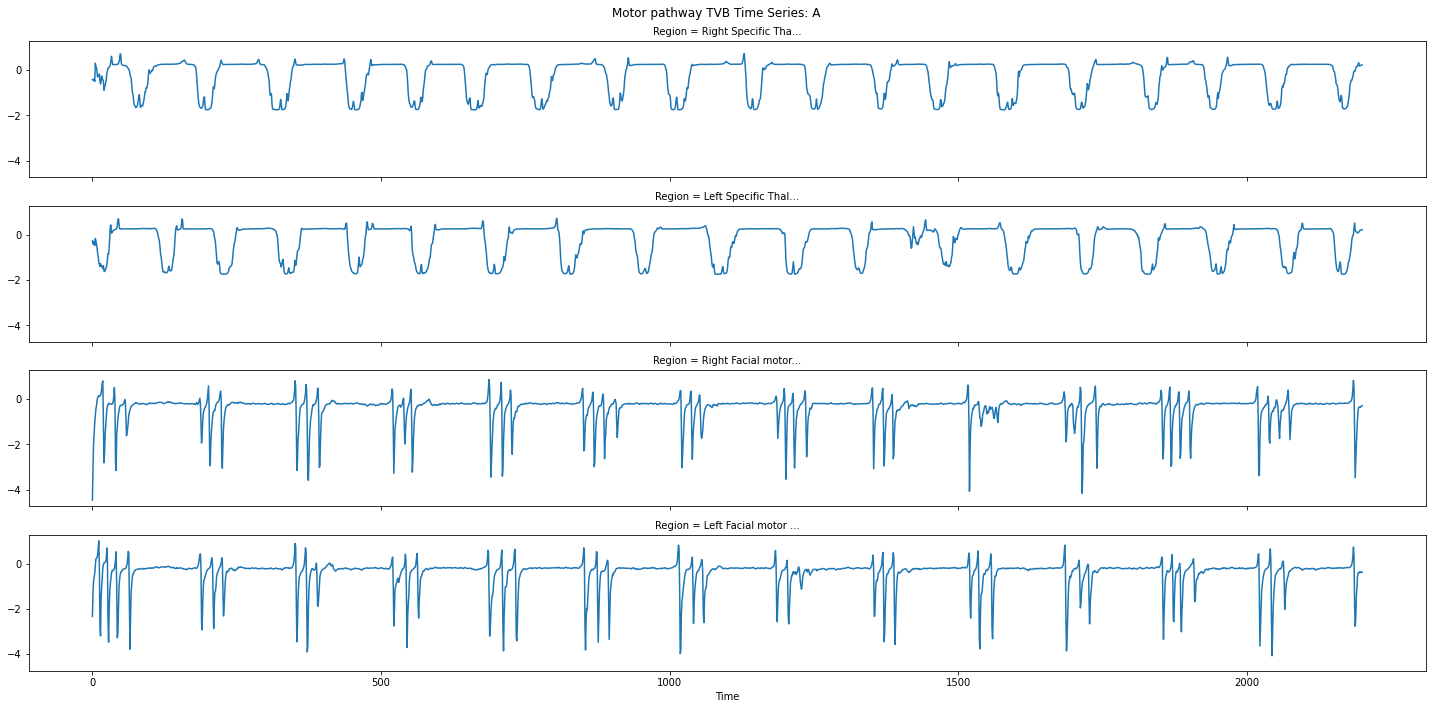

In [8]:
# Focus on the the motor pathway: 
if source_ts is not None:
    source_ts_motor = source_ts[-10000:, :, inds["motor"]]
    source_ts_motor.plot_timeseries(plotter_config=plotter.config, 
                                   hue="Region" if source_ts_motor.shape[2] > MAX_REGIONS_IN_ROWS else None, 
                                   per_variable=source_ts_motor.shape[1] > MAX_VARS_IN_COLS, 
                                   figsize=FIGSIZE, figname="Motor pathway TVB Time Series");

In [9]:
# Focus on the motor pathway: raster plot
if source_ts_motor is not None and source_ts_motor.number_of_labels > MIN_REGIONS_FOR_RASTER_PLOT:
    source_ts_motor.plot_raster(plotter_config=plotter.config, 
                                  per_variable=source_ts_motor.shape[1] > MAX_VARS_IN_COLS,
                                  figsize=FIGSIZE, figname="Motor pathway TVB Time Series Raster");

2022-07-01 10:08:23,469 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!
2022-07-01 10:08:23,474 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


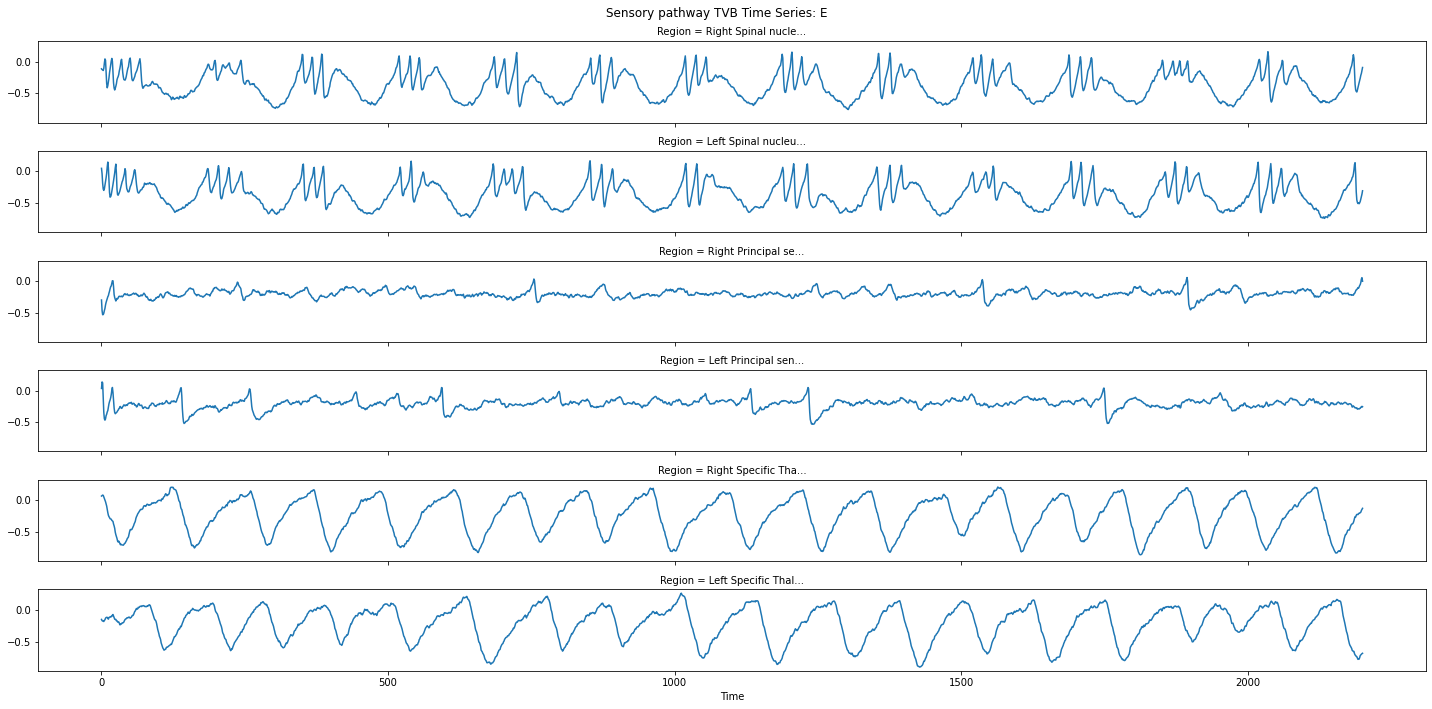

2022-07-01 10:08:24,249 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


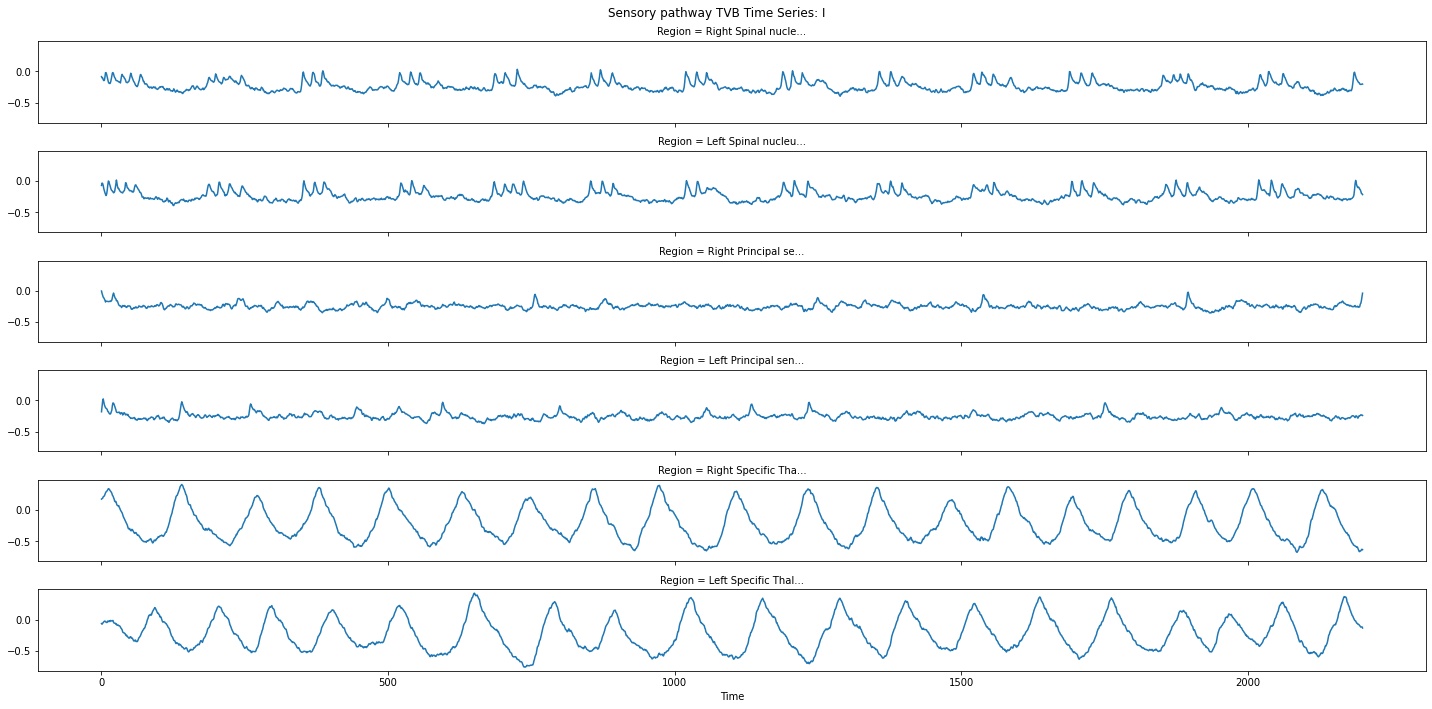

2022-07-01 10:08:25,008 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


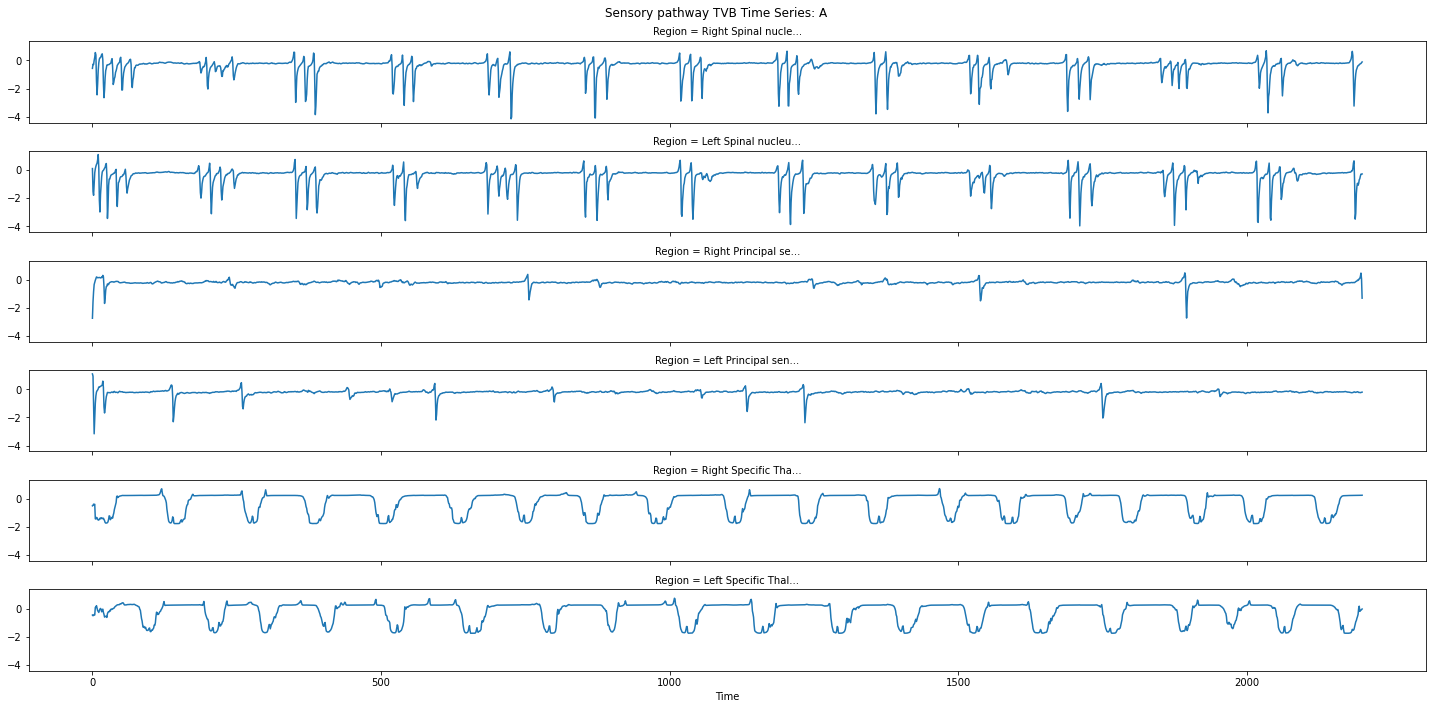

In [10]:
# Focus on the sensory pathway: 
if source_ts is not None:
    source_ts_sens = source_ts[-10000:, :, inds["sens"]]
    source_ts_sens.plot_timeseries(plotter_config=plotter.config, 
                                   hue="Region" if source_ts_sens.shape[2] > MAX_REGIONS_IN_ROWS else None, 
                                   per_variable=source_ts_sens.shape[1] > MAX_VARS_IN_COLS, 
                                   figsize=FIGSIZE, figname="Sensory pathway TVB Time Series");

In [11]:
# Focus on the sensory pathway: raster plot
if source_ts is not None and source_ts_sens.number_of_labels > MIN_REGIONS_FOR_RASTER_PLOT:
    source_ts_sens.plot_raster(plotter_config=plotter.config, 
                               per_variable=source_ts_sens.shape[1] > MAX_VARS_IN_COLS,
                               figsize=FIGSIZE, figname="Sensory pathway TVB Time Series Raster");

In [12]:
# bold_ts TVB time series
if bold_ts is not None:
    bold_ts.plot_timeseries(plotter_config=plotter.config, 
                            hue="Region" if bold_ts.shape[2] > MAX_REGIONS_IN_ROWS else None, 
                            per_variable=bold_ts.shape[1] > MAX_VARS_IN_COLS, 
                            figsize=FIGSIZE);

In [13]:
# # Focus on the m1 and s1 barrel field nodes: 
# if bold_ts is not None:
#     bold_ts_m1s1brl = bold_ts[-10000:, :, inds["m1s1brl"]]
#     bold_ts_m1s1brl.plot_timeseries(plotter_config=plotter.config, 
#                                     hue="Region" if bold_ts_m1s1brl.shape[2] > MAX_REGIONS_IN_ROWS else None, 
#                                     per_variable=bold_ts_m1s1brl.shape[1] > MAX_VARS_IN_COLS, 
#                                     figsize=FIGSIZE, figname="M1 and S1 barrel field nodes BOLD Time Series");

In [14]:
# # Focus on the m1 and s1 barrel field nodes: raster plot
# if bold_ts is not None and bold_ts_m1s1brl.number_of_labels > MIN_REGIONS_FOR_RASTER_PLOT:
#     bold_ts_m1s1brl.plot_raster(plotter_config=plotter.config, 
#                                 per_variable=bold_ts_m1s1brl.shape[1] > MAX_VARS_IN_COLS,
#                                 figsize=FIGSIZE, figname="M1 and S1 barrel field nodes BOLD Time Series Raster");

In [15]:
# # Focus on the the motor pathway: 
# if bold_ts is not None:
#     bold_ts_motor = bold_ts[-10000:, :, inds["motor"]]
#     bold_ts_motor.plot_timeseries(plotter_config=plotter.config, 
#                                    hue="Region" if bold_ts_motor.shape[2] > MAX_REGIONS_IN_ROWS else None, 
#                                    per_variable=bold_ts_motor.shape[1] > MAX_VARS_IN_COLS, 
#                                    figsize=FIGSIZE, figname="Motor pathway BOLD Time Series");

In [16]:
# # Focus on the motor pathway: raster plot
# if bold_ts is not None and bold_ts_motor.number_of_labels > MIN_REGIONS_FOR_RASTER_PLOT:
#     bold_ts_motor.plot_raster(plotter_config=plotter.config, 
#                               per_variable=bold_ts_motor.shape[1] > MAX_VARS_IN_COLS,
#                               figsize=FIGSIZE, figname="Motor pathway BOLD Time Series Raster");

In [17]:
# # Focus on the sensory pathway: 
# if bold_ts is not None:
#     bold_ts_sens = bold_ts[-10000:, :, inds["sens"]]
#     bold_ts_sens.plot_timeseries(plotter_config=plotter.config, 
#                                  hue="Region" if bold_ts_sens.shape[2] > MAX_REGIONS_IN_ROWS else None, 
#                                  per_variable=bold_ts_sens.shape[1] > MAX_VARS_IN_COLS, 
#                                  figsize=FIGSIZE, figname="Sensory pathway BOLD Time Series");

In [18]:
# # Focus on the sensory pathway: raster plot
# if bold_ts is not None and bold_ts_sens.number_of_labels > MIN_REGIONS_FOR_RASTER_PLOT:
#     bold_ts_sens.plot_raster(plotter_config=plotter.config, 
#                              per_variable=bold_ts_sens.shape[1] > MAX_VARS_IN_COLS,
#                              figsize=FIGSIZE, figname="Sensory pathway BOLD Time Series Raster");

### Interactive time series plot

In [19]:
# # ...interactively as well
# # For interactive plotting:
# %matplotlib notebook 
# plotter.plot_timeseries_interactive(source_ts)

In [20]:
# # For interactive plotting:
# %matplotlib notebook  


# from tvb.datatypes.time_series import TimeSeries
# from tvb.contrib.scripts.plot.power_spectra_interactive import PowerSpectraInteractive

# tsr = TimeSeries(data=source_ts[1000:, 0, inds["m1s1brl"]]._data.values, sample_period=source_ts.sample_period)
# psi = PowerSpectraInteractive()
# psi.time_series = tsr
# psi.window_length = 1000.0
# psi.show()
# from ipywidgets import interact, widgets as ip_widgets
# from IPython.display import display

# textRegions = ip_widgets.Text(
#     value='',
#     placeholder='Regions Slicer',
#     description='start:stop:step',
#     disabled=False
# )

# textFreqs = ip_widgets.Text(
#     value='',
#     placeholder='Frequency Range',
#     description='f_min, f_max',
#     disabled=False
# )

# def callbackRegions(wdgt):
#     # replace by something useful
#     psi.update_regions(wdgt.value)

# def callbackFreqs(wdgt):
#     # replace by something useful
#     psi.update_freq_range(wdgt.value)
    
# textRegions.on_submit(callbackRegions)
# textFreqs.on_submit(callbackFreqs)

# display(textRegions)
# display(textFreqs)



# Compute data and target PSDs and compare:


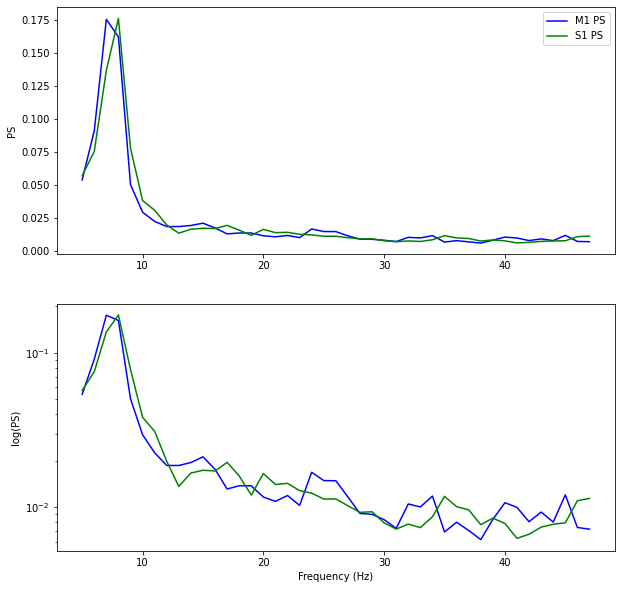

In [21]:
PSD_target = compute_target_PSDs(config, write_files=True, plotter=plotter)

/home/docker/env/neurosci/lib/python3.9/site-packages/scipy/signal/_spectral_py.py:1961: UserWarning: nperseg = 2048 is greater than input length  = 1999, using nperseg = 1999
  warnings.warn('nperseg = {0:d} is greater than input length '


(4, 1000)


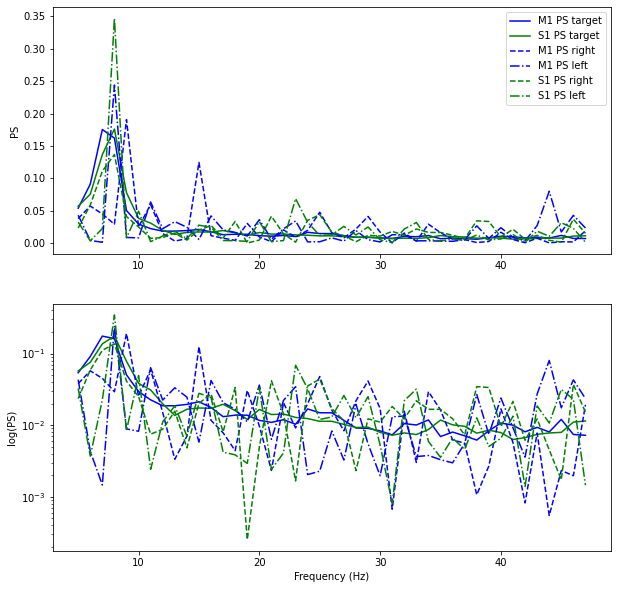

In [22]:
PSD = compute_data_PSDs(results[0], PSD_target, inds, transient, write_files=False, plotter=plotter)

2022-07-01 10:08:26,812 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


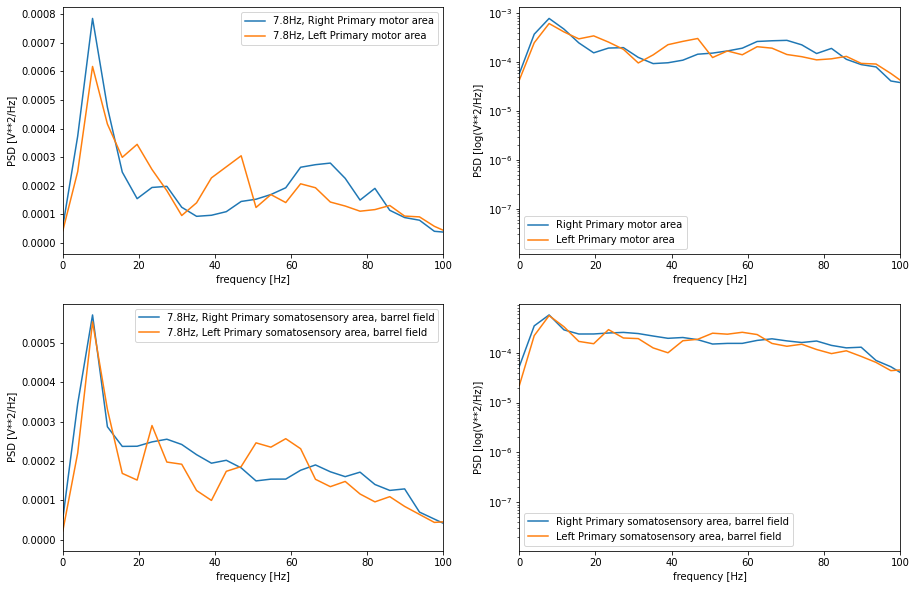

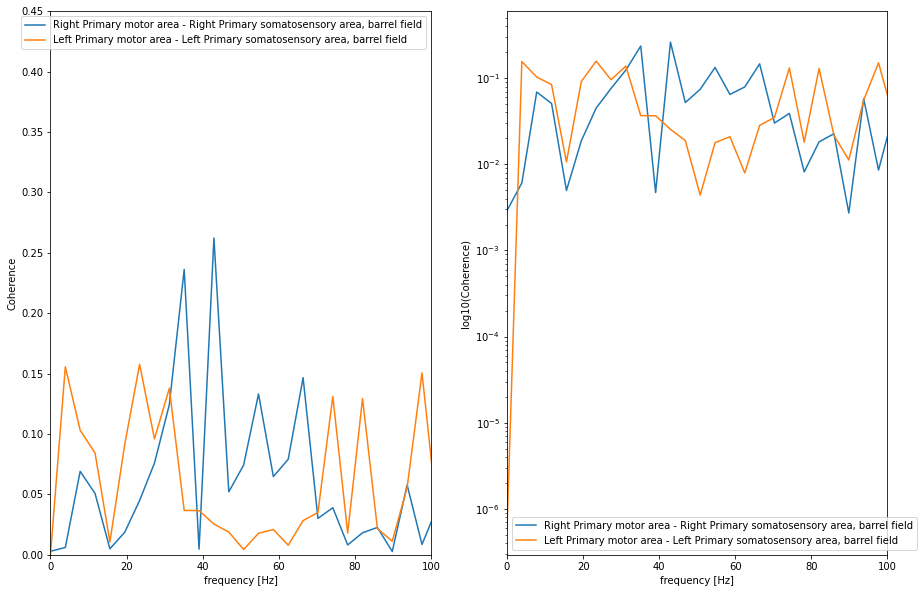

In [23]:
%matplotlib inline 

from examples.tvb_nest.notebooks.cerebellum.utils import  compute_plot_selected_spectra_coherence, compute_plot_ica

NPERSEG = np.array([256, 512, 1024, 2048, 4096])
NPERSEG = NPERSEG[np.argmin(np.abs(NPERSEG - (source_ts.shape[0]-transient/config.DEFAULT_DT)))]

# Power Spectra and Coherence for M1 - S1 barrel field
CxyR, fR, fL, CxyL =compute_plot_selected_spectra_coherence(source_ts, inds["m1s1brl"], 
                                        transient=transient, nperseg=NPERSEG, fmin=0.0, fmax=100.0)

In [24]:
import pickle

with open('coherence_MF_cerebON_2sec.pickle', 'wb') as handle:
    pickle.dump([CxyR, fR, fL, CxyL], handle)

2022-07-01 10:08:28,098 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


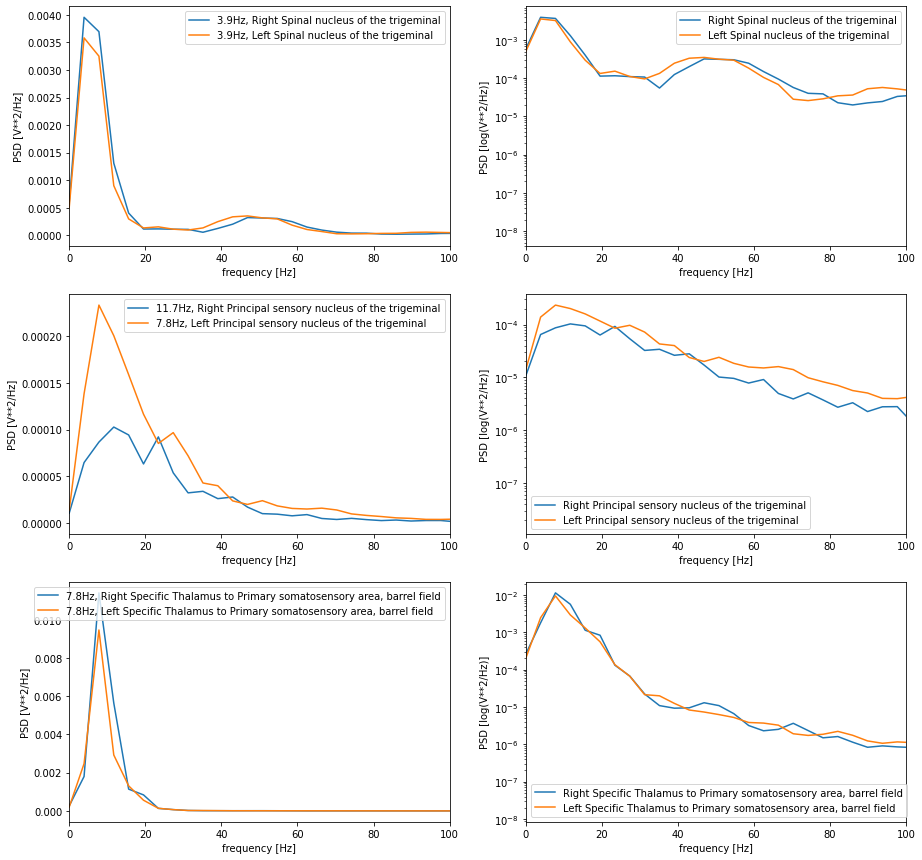

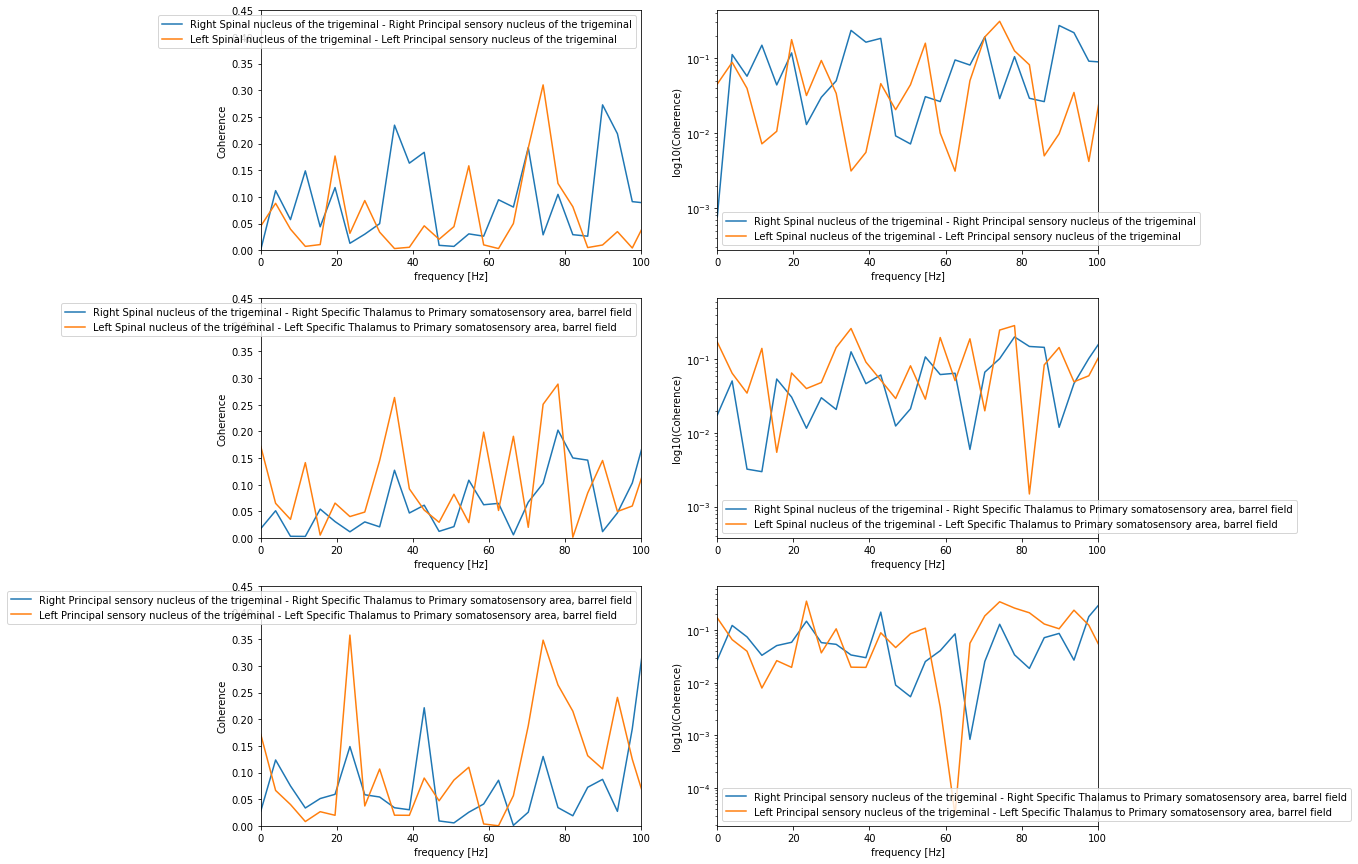

(array([0.02734443, 0.12351278, 0.0748447 , 0.0334228 , 0.05113747,
        0.05908295, 0.14865744, 0.05824417, 0.05403248, 0.03389484,
        0.03010871, 0.22148031, 0.00907617, 0.00545035, 0.02545384,
        0.04087566, 0.08543701, 0.00084277, 0.02548582, 0.1300999 ,
        0.03413465, 0.01882631, 0.07228408, 0.08713047, 0.02708677,
        0.18209097, 0.39132871, 0.05622976, 0.04202354, 0.04436678,
        0.04954884, 0.07346432, 0.0185536 , 0.06708788, 0.11571529,
        0.08332711, 0.00381101, 0.0348635 , 0.1480959 , 0.12657397,
        0.02667254, 0.04881248, 0.08365163, 0.12700284, 0.04498593,
        0.02814273, 0.01031309, 0.03092432, 0.20879865, 0.08472601,
        0.06293891, 0.04714178, 0.36523182, 0.03394703, 0.07525484,
        0.05657469, 0.12083697, 0.01916263, 0.06072496, 0.07237298,
        0.14210163, 0.1584059 , 0.03381324, 0.17871699, 0.01125821,
        0.43145736, 0.09157375, 0.05576283, 0.07538639, 0.03162533,
        0.02630033, 0.04349124, 0.05524968, 0.02

In [25]:
# Power Spectra and Coherence along the sensory pathway:
# for Medulla SPV, Sensory PONS
compute_plot_selected_spectra_coherence(source_ts, inds["sens"], 
                                        transient=transient, nperseg=NPERSEG, fmin=0.0, fmax=100.0)

/home/docker/env/neurosci/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


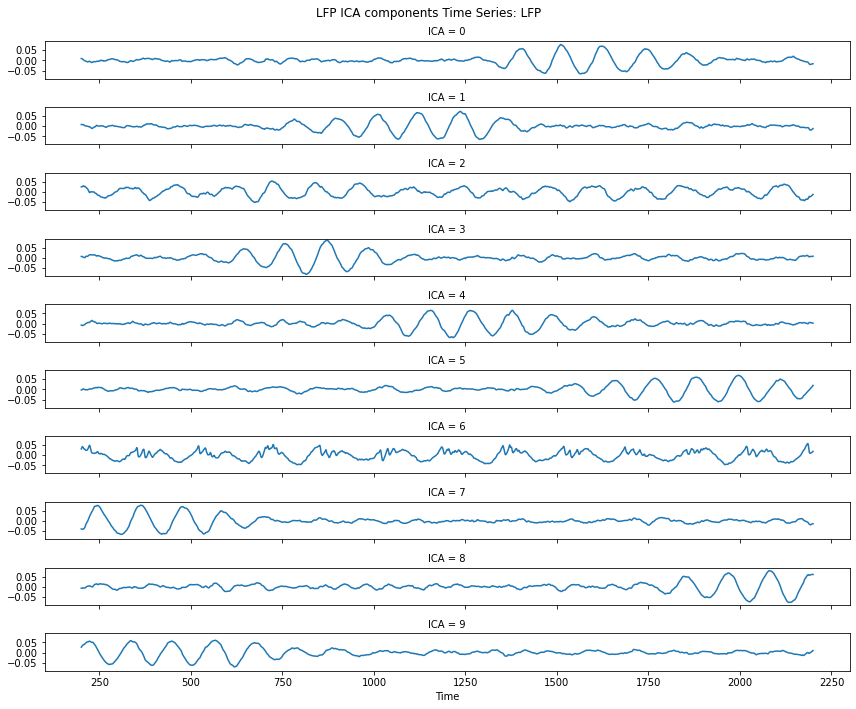

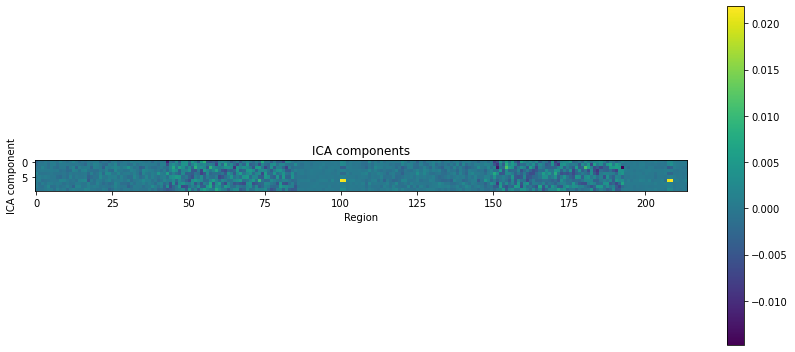

In [26]:
plotter.config.DEFAULT_SIZE = (12, 10)  # FIGSIZE
if source_ts is not None:
    # LFP (E) ICA:
    lfp_ica_comps, lfp_ics_ts, lfp_ica = compute_plot_ica(source_ts[transient:].data[:, 0, :, 0].squeeze(), 
                                                          source_ts[transient:].time,
                                                          variable="LFP", n_components=10, plotter=plotter)
    

In [27]:
if bold_ts is not None:    
    # BOLD ICA:
    bold_ica_comps, bold_ics_ts, bold_ica = compute_plot_ica(bold_ts.data[:, 0, :, 0].squeeze(), bold_ts.time,
                                                             variable="BOLD", n_components=10, plotter=plotter)
    

# References

1 Sanz Leon P, Knock SA , Woodman MM, Domide L, <br>
  Mersmann J, McIntosh AR, Jirsa VK. 2013. <br>
  The Virtual Brain: a simulator of primate brain network dynamics. <br>
  Frontiers in Neuroinformatics (7:10. doi: 10.3389/fninf.2013.00010) <br>
  https://www.thevirtualbrain.org/tvb/zwei <br>
  https://github.com/the-virtual-brain <br>

2 Ritter P, Schirner M, McIntosh AR, Jirsa VK. 2013.  <br>
  The Virtual Brain integrates computational modeling and multimodal neuroimaging. <br>
  Brain Connectivity 3:121–145. <br>

3 Griffiths JD, McIntosh AR, Lefebvre J. 2020.   <br>
  A Connectome-Based, Corticothalamic Model of State- <br>
  and Stimulation-Dependent Modulation of Rhythmic Neural Activity and Connectivity <br>
  Frontiers in Computational Neuroscience (vol. 14. doi: 10.3389/fncom.2020.575143) <br>
  https://www.frontiersin.org/articles/10.3389/fncom.2020.575143/full#h12
  
4 Jordan, Jakob; Mørk, Håkon; Vennemo, Stine Brekke;   Terhorst, Dennis; Peyser, <br>
  Alexander; Ippen, Tammo; Deepu, Rajalekshmi;   Eppler, Jochen Martin; <br>
  van Meegen, Alexander;   Kunkel, Susanne; Sinha, Ankur; Fardet, Tanguy; Diaz, <br>
  Sandra; Morrison, Abigail; Schenck, Wolfram; Dahmen, David;   Pronold, Jari; <br>
  Stapmanns, Jonas;   Trensch, Guido; Spreizer, Sebastian;   Mitchell, Jessica; <br>
  Graber, Steffen; Senk, Johanna; Linssen, Charl; Hahne, Jan; Serenko, Alexey; <br>
  Naoumenko, Daniel; Thomson, Eric;   Kitayama, Itaru; Berns, Sebastian;   <br>
  Plesser, Hans Ekkehard <br>
  NEST is a simulator for spiking neural network models that focuses <br>
  on the dynamics, size and structure of neural systems rather than on <br>
  the exact morphology of individual neurons. <br>
  For further information, visit http://www.nest-simulator.org. <br>
  The release notes for this release are available at  <br>
  https://github.com/nest/nest-simulator/releases/tag/v2.18.0 <br>

(1999, 86)
(1999, 42)
(1999, 86)


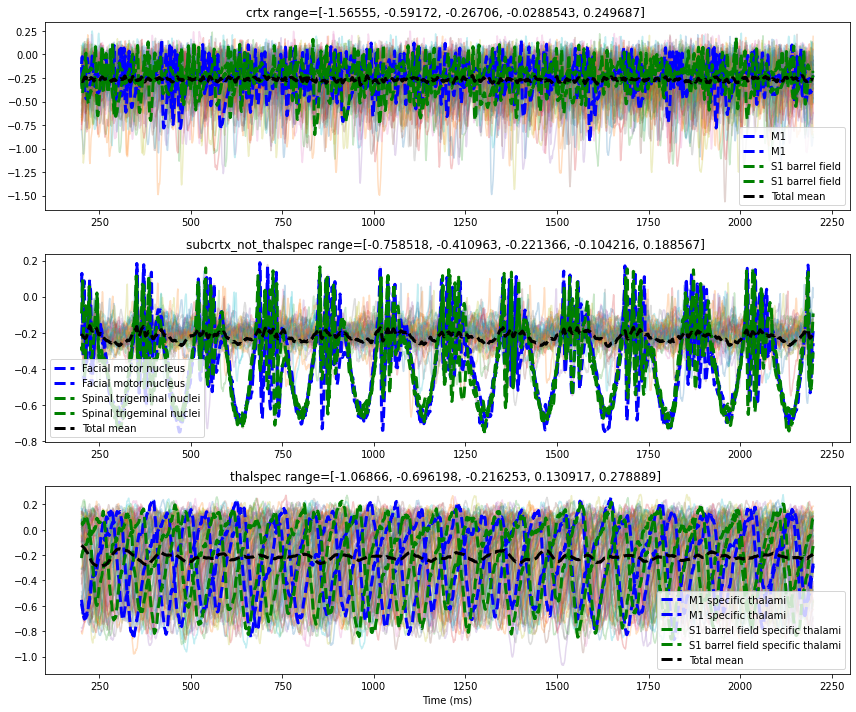

In [28]:
%matplotlib inline

import matplotlib.pyplot as plt

data = source_ts.data
time = source_ts.time

fig, axes = plt.subplots(3, 1, figsize=(12, 10))
for iT, regs in enumerate(["crtx", "subcrtx_not_thalspec", "thalspec"]):
    transient_in_points = int((transient+0.5)/simulator.monitors[0].period)
    dat = data[transient_in_points:, 0, inds[regs]].squeeze()
    print(dat.shape)
    axes[iT].plot(time[transient_in_points:], dat, alpha=0.25)
    if iT == 0:
        axes[iT].plot(time[transient_in_points:], data[transient_in_points:, 0, inds["m1"]].squeeze(), 
                      'b--', linewidth=3, label='M1')
        axes[iT].plot(time[transient_in_points:], data[transient_in_points:, 0, inds["s1brl"]].squeeze(), 
                      'g--', linewidth=3, label='S1 barrel field')
    elif iT == 1:
        axes[iT].plot(time[transient_in_points:], data[transient_in_points:, 0, inds["facial"]].squeeze(), 
                      'b--', linewidth=3, label='Facial motor nucleus')
        axes[iT].plot(time[transient_in_points:], data[transient_in_points:, 0, inds["trigeminal"]].squeeze(), 
                      'g--', linewidth=3, label='Spinal trigeminal nuclei')
    else:
        axes[iT].plot(time[transient_in_points:], data[transient_in_points:, 0, [44, 166]].squeeze(), 
                      'b--', linewidth=3, label='M1 specific thalami')
        axes[iT].plot(time[transient_in_points:], data[transient_in_points:, 0, [47, 169]].squeeze(), 
                      'g--', linewidth=3, label='S1 barrel field specific thalami')
        axes[iT].set_xlabel('Time (ms)')
    axes[iT].plot(time[transient_in_points:], dat.mean(axis=1), 'k--', linewidth=3, label='Total mean')
    axes[iT].legend()
    axes[iT].set_title("%s range=[%g, %g, %g, %g, %g] " % 
                       (regs, dat.min(), np.percentile(dat, 5), dat.mean(), np.percentile(dat, 95), dat.max()))
fig.tight_layout()